In [69]:
pip install tensorflow opencv-python numpy

Note: you may need to restart the kernel to use updated packages.


In [70]:
import pandas as pd
import os
import cv2
import numpy as np
import tensorflow as tf

# Paths to your data
IMAGE_DIR_CAR = 'Dataset/license_plates_detection_train'
IMAGE_DIR_NUMBERPLATE = 'Dataset/license_plates_recognition_train'

ANNOTATION_FILE = 'Dataset/Licplatesdetection_train.csv'
TEXT_FILE = 'Dataset/Licplatesrecognition_train.csv'



# Load the dataset
detection_df = pd.read_csv(ANNOTATION_FILE)
recognition_df = pd.read_csv(TEXT_FILE)


In [71]:
import pathlib
data_dir = 'Dataset/license_plates_detection_train'
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Dataset/license_plates_detection_train')

In [72]:
car_images = list(data_dir.glob('*.jpg'))

In [73]:
len(car_images)

900

In [74]:
car_images[:5]

[WindowsPath('Dataset/license_plates_detection_train/1.jpg'),
 WindowsPath('Dataset/license_plates_detection_train/10.jpg'),
 WindowsPath('Dataset/license_plates_detection_train/100.jpg'),
 WindowsPath('Dataset/license_plates_detection_train/101.jpg'),
 WindowsPath('Dataset/license_plates_detection_train/102.jpg')]

In [75]:
detection_df

,img_id,ymin,xmin,ymax,xmax
0,1.jpg,276,94,326,169
1,10.jpg,311,395,344,444
2,100.jpg,406,263,450,434
3,101.jpg,283,363,315,494
4,102.jpg,139,42,280,222
...,...,...,...,...,...
895,95.jpg,426,34,508,140
896,96.jpg,356,378,457,548
897,97.jpg,229,149,283,217
898,98.jpg,272,252,300,383


In [76]:
detection_df.drop(['img_id'],axis=1,inplace=True)

In [77]:
detection_df

,ymin,xmin,ymax,xmax
0,276,94,326,169
1,311,395,344,444
2,406,263,450,434
3,283,363,315,494
4,139,42,280,222
...,...,...,...,...
895,426,34,508,140
896,356,378,457,548
897,229,149,283,217
898,272,252,300,383


In [78]:
np.array(detection_df.iloc[0])

array([276,  94, 326, 169], dtype=int64)

In [79]:
X, y = [], []

for image in car_images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(np.array(detection_df.iloc[0]))

In [80]:
X = np.array(X)

In [81]:
X.shape

(900, 224, 224, 3)

In [82]:
X[0].shape

(224, 224, 3)

In [83]:
y[0].shape

(4,)

In [84]:

y_concatenated = np.concatenate(y, axis=0)
y_reshaped = y_concatenated.reshape(-1, 4)
print("Shape of y after reshaping:", y_reshaped.shape)


Shape of y after reshaping: (900, 4)


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_reshaped, random_state=0)

In [99]:
X_train.shape

(675, 224, 224, 3)

In [86]:
X_train[0]

array([[[218, 216, 216],
        [220, 216, 217],
        [222, 217, 218],
        ...,
        [139, 143, 150],
        [128, 137, 150],
        [117, 127, 137]],

       [[218, 216, 216],
        [220, 216, 217],
        [223, 218, 219],
        ...,
        [156, 162, 171],
        [140, 152, 163],
        [149, 161, 171]],

       [[219, 217, 217],
        [223, 218, 219],
        [223, 218, 219],
        ...,
        [145, 155, 168],
        [127, 139, 152],
        [124, 137, 148]],

       ...,

       [[201, 201, 201],
        [204, 204, 204],
        [203, 203, 203],
        ...,
        [122, 137, 153],
        [128, 140, 154],
        [137, 143, 157]],

       [[201, 201, 201],
        [207, 207, 207],
        [205, 205, 205],
        ...,
        [114, 129, 145],
        [130, 143, 154],
        [147, 153, 164]],

       [[190, 190, 190],
        [206, 206, 206],
        [204, 204, 204],
        ...,
        [121, 131, 145],
        [141, 150, 160],
        [154, 158, 163]]

In [100]:
y_train.shape

(675, 4)

In [101]:
y_train[0]

array([276,  94, 326, 169], dtype=int64)

In [88]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [89]:
X_train_scaled

array([[[[0.85490196, 0.84705882, 0.84705882],
         [0.8627451 , 0.84705882, 0.85098039],
         [0.87058824, 0.85098039, 0.85490196],
         ...,
         [0.54509804, 0.56078431, 0.58823529],
         [0.50196078, 0.5372549 , 0.58823529],
         [0.45882353, 0.49803922, 0.5372549 ]],

        [[0.85490196, 0.84705882, 0.84705882],
         [0.8627451 , 0.84705882, 0.85098039],
         [0.8745098 , 0.85490196, 0.85882353],
         ...,
         [0.61176471, 0.63529412, 0.67058824],
         [0.54901961, 0.59607843, 0.63921569],
         [0.58431373, 0.63137255, 0.67058824]],

        [[0.85882353, 0.85098039, 0.85098039],
         [0.8745098 , 0.85490196, 0.85882353],
         [0.8745098 , 0.85490196, 0.85882353],
         ...,
         [0.56862745, 0.60784314, 0.65882353],
         [0.49803922, 0.54509804, 0.59607843],
         [0.48627451, 0.5372549 , 0.58039216]],

        ...,

        [[0.78823529, 0.78823529, 0.78823529],
         [0.8       , 0.8       , 0.8       ]

In [90]:
import matplotlib.pyplot as plt

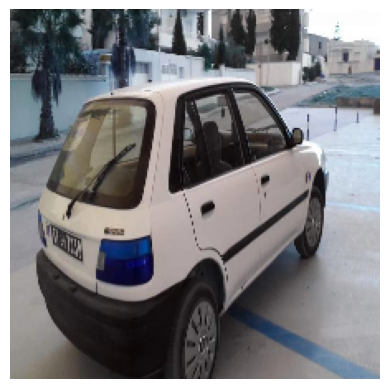

In [91]:
plt.axis('off')
plt.imshow(X[0])

In [92]:
IMAGE_SHAPE = (224,224)

In [171]:
import tensorflow_hub as hub
model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")
